In [2]:
import numpy as np
import pandas as pd

import string
import nltk
import itertools

In [3]:
spam_dataset = pd.read_csv('/content/spam.csv', encoding='ISO-8859-1', usecols=[0, 1], skiprows=1, names=['Spam', 'Text'])

spam_dataset['Spam'] = spam_dataset['Spam'].replace(['ham', 'spam'], [0, 1])
spam_dataset['Spam'] = spam_dataset['Spam'].astype(int)

spam_dataset

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [4]:
spam_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Spam    5572 non-null   int64 
 1   Text    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [5]:
print(spam_dataset['Spam'].value_counts(normalize=True))

0    0.865937
1    0.134063
Name: Spam, dtype: float64


In [6]:
# for counting unique elements
def unique_elements(df, col_name, tokenized=False):
    elements = []
    df_copied = df.copy()
    df_copied.reset_index(drop=True, inplace=True)
    
    for i in range(df_copied.shape[0]):
        if tokenized==False:
            elements = elements + [word for word in df_copied.loc[i, col_name].split()]
        else:
            elements = elements + df_copied.loc[i, col_name]
    return len(list(set(elements)))

In [7]:
unique_elements(df=spam_dataset, col_name='Text')

15585

Removing Punctuation

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punctuation(text):
    cleaned = ''.join([word for word in text if word not in string.punctuation])
    return cleaned

spam_dataset['Cleaned_text'] = spam_dataset['Text'].apply(lambda x: remove_punctuation(x))
spam_dataset

,Spam,Text,Cleaned_text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...


In [10]:
unique_elements(df=spam_dataset, col_name='Cleaned_text')

11625

Tokenization

In [11]:
nltk.download('punkt')
def tokenizer(text):
    # Usunięcie wielkich liter
    lower_text = text.lower()
    # Tokenizacja
    tokenized_text = nltk.word_tokenize(lower_text)
    return tokenized_text

spam_dataset['Tokenized_Text'] = spam_dataset['Cleaned_text'].apply(lambda x: tokenizer(x))
spam_dataset

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Spam,Text,Cleaned_text,Tokenized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,..."
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


In [12]:
unique_elements(df=spam_dataset, col_name='Tokenized_Text', tokenized=True)

9558

Removing stop words

In [15]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:20]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [16]:
def remove_stopwords(text):
    without_stopwords = [word for word in text if word not in stopwords]
    return without_stopwords

spam_dataset['WithoutStop_Text'] = spam_dataset['Tokenized_Text'].apply(lambda x: remove_stopwords(x))
spam_dataset

,Spam,Text,Cleaned_text,Tokenized_Text,WithoutStop_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


In [17]:
unique_elements(df=spam_dataset, col_name='WithoutStop_Text', tokenized=True)

9427

Remove short tokens

In [18]:
def remove_short_tokens(text):
    without_shorts = [word for word in text if len(word)>2]
    return without_shorts

spam_dataset['WithoutShorts_Text'] = spam_dataset['WithoutStop_Text'].apply(lambda x: remove_short_tokens(x))
spam_dataset

,Spam,Text,Cleaned_text,Tokenized_Text,WithoutStop_Text,WithoutShorts_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[jurong, point, crazy, available, bugis, great..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, wkly, comp, win, cup, final, tkt..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[dun, say, early, hor, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t..."
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tried, contact, å£750, pound, priz..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[going, esplanade, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[pity, mood, soany, suggestions]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, interested, buyin..."


In [19]:
unique_elements(df=spam_dataset, col_name='WithoutShorts_Text', tokenized=True)

9150

Stemming

In [20]:
stemmer = nltk.PorterStemmer()

In [21]:
def stemming(text):
    stemmed_words = [stemmer.stem(word) for word in text]
    return stemmed_words

spam_dataset['Stemmed_Text'] = spam_dataset['WithoutShorts_Text'].apply(lambda x: stemming(x))
spam_dataset

,Spam,Text,Cleaned_text,Tokenized_Text,WithoutStop_Text,WithoutShorts_Text,Stemmed_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]","[lar, joke, wif, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, wkly, comp, win, cup, final, tkt...","[free, entri, wkli, comp, win, cup, final, tkt..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[dun, say, early, hor, already, say]","[dun, say, earli, hor, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho..."
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tried, contact, å£750, pound, priz...","[2nd, time, tri, contact, å£750, pound, prize,..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[going, esplanade, home]","[go, esplanad, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, someth,..."


In [22]:
unique_elements(df=spam_dataset, col_name='Stemmed_Text', tokenized=True)

7845

Lemmatization

In [23]:
from nltk.corpus import wordnet
lemmater = nltk.WordNetLemmatizer()

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'N': wordnet.NOUN,
                'V': wordnet.VERB,
                'J': wordnet.ADJ,
                'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [24]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
def lemmatizing(text):
    lemmatized_words = [lemmater.lemmatize(word, get_wordnet_pos(word)) for word in text]
    return lemmatized_words

spam_dataset['Lemmatized_Text'] = spam_dataset['WithoutShorts_Text'].apply(lambda x: lemmatizing(x))
spam_dataset

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Spam,Text,Cleaned_text,Tokenized_Text,WithoutStop_Text,WithoutShorts_Text,Stemmed_Text,Lemmatized_Text
0,0,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[jurong, point, crazy, available, bugis, great...","[jurong, point, crazi, avail, bugi, great, wor...","[jurong, point, crazy, available, bugis, great..."
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[lar, joking, wif, oni]","[lar, joke, wif, oni]","[lar, joking, wif, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, wkly, comp, win, cup, final, tkt...","[free, entri, wkli, comp, win, cup, final, tkt...","[free, entry, wkly, comp, win, cup, final, tkt..."
3,0,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[dun, say, early, hor, already, say]","[dun, say, earli, hor, alreadi, say]","[dun, say, early, hor, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goes, usf, lives, around, t...","[nah, dont, think, goe, usf, live, around, tho...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,This is the 2nd time we have tried 2 contact u...,"[this, is, the, 2nd, time, we, have, tried, 2,...","[2nd, time, tried, 2, contact, u, u, å£750, po...","[2nd, time, tried, contact, å£750, pound, priz...","[2nd, time, tri, contact, å£750, pound, prize,...","[2nd, time, try, contact, å£750, pound, prize,..."
5568,0,Will Ì_ b going to esplanade fr home?,Will Ì b going to esplanade fr home,"[will, ì, b, going, to, esplanade, fr, home]","[ì, b, going, esplanade, fr, home]","[going, esplanade, home]","[go, esplanad, home]","[go, esplanade, home]"
5569,0,"Pity, * was in mood for that. So...any other s...",Pity was in mood for that Soany other suggest...,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestions]","[pity, mood, soany, suggestions]","[piti, mood, soani, suggest]","[pity, mood, soany, suggestion]"
5570,0,The guy did some bitching but I acted like i'd...,The guy did some bitching but I acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...","[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, someth,...","[guy, bitching, act, like, interested, buying,..."


In [25]:
unique_elements(df=spam_dataset, col_name='Lemmatized_Text', tokenized=True)

8158

Operation pipeline

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [27]:
class RemovePunctuationTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_punctuation(x))
        return X_

class TokenizeTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: tokenizer(x))
        return X_


class RemoveStopwordsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_stopwords(x))
        return X_


class RemoveShortTokensTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: remove_short_tokens(x))
        return X_


class StemTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: stemming(x))
        return X_
    
class LemmTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: lemmatizing(x))
        return X_

In [28]:
df_raw = spam_dataset[['Spam', 'Text']].copy()
print('Raw Data..')
display(df_raw)
print('--------------------')
nlp_pipeline = Pipeline(steps=[
    ('remove_punctuation', RemovePunctuationTransformer(text_column='Text')),
    ('tokenizer', TokenizeTransformer(text_column='Text')),
    ('remove_stop_words', RemoveStopwordsTransformer(text_column='Text')),
    ('remove_short_tokens', RemoveShortTokensTransformer(text_column='Text')),
    ('stemmer', StemTransformer(text_column='Text'))
])

df_raw_transformed = nlp_pipeline.fit_transform(df_raw)
df_raw_transformed

Raw Data..


,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


--------------------


,Spam,Text
0,0,"[jurong, point, crazi, avail, bugi, great, wor..."
1,0,"[lar, joke, wif, oni]"
2,1,"[free, entri, wkli, comp, win, cup, final, tkt..."
3,0,"[dun, say, earli, hor, alreadi, say]"
4,0,"[nah, dont, think, goe, usf, live, around, tho..."
...,...,...
5567,1,"[2nd, time, tri, contact, å£750, pound, prize,..."
5568,0,"[go, esplanad, home]"
5569,0,"[piti, mood, soani, suggest]"
5570,0,"[guy, bitch, act, like, interest, buy, someth,..."


In [30]:
df_raw = spam_dataset[['Spam', 'Text']].copy()
df_raw

,Spam,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Prepare train test sets

In [31]:
from sklearn.model_selection import train_test_split

X, y = df_raw[['Text']].copy(), df_raw['Spam'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2023, stratify=y)

In [32]:
pd.Series(y_train).value_counts(normalize=True)

0    0.866116
1    0.133884
Name: Spam, dtype: float64

In [33]:
pd.Series(y_test).value_counts(normalize=True)

0    0.865757
1    0.134243
Name: Spam, dtype: float64

Vectorization

In [34]:
class Return_String_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, text_column):
        self.text_column = text_column
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        X_[self.text_column] = X_[self.text_column].apply(lambda x: ' '.join(x))
        X_ = pd.Series(X_[self.text_column])
        return X_

In [35]:
display(X_train)

nlp_pipeline = Pipeline(steps=[
    ('remove_punctuation', RemovePunctuationTransformer(text_column='Text')),
    ('tokenizer', TokenizeTransformer(text_column='Text')),
    ('remove_stop_words', RemoveStopwordsTransformer(text_column='Text')),
    ('remove_short_tokens', RemoveShortTokensTransformer(text_column='Text')),
    ('stemmer', StemTransformer(text_column='Text')),
    ('return_string', Return_String_Transformer('Text'))
])

nlp_pipeline.fit_transform(X_train)

,Text
942,How about getting in touch with folks waiting ...
1595,Pls confirm the time to collect the cheque.
4046,"Thanks for your ringtone order, reference numb..."
1682,HI BABE U R MOST LIKELY TO BE IN BED BUT IM SO...
696,"Aight, you close by or still down around alex'..."
...,...
3498,I hope you arnt pissed off but id would really...
1509,When u love someone Dont make them to love u a...
443,"Sorry, I'll call later"
2679,"New Tones This week include: 1)McFly-All Ab..,..."


942     get touch folk wait compani txt back name age ...
1595                        pl confirm time collect chequ
4046    thank rington order refer number x49your mobil...
1682    babe like bed sorri tonight realli wan see tom...
696                   aight close still around alex place
                              ...                        
3498    hope arnt piss would realli like see tomorrow ...
1509    love someon dont make love much love much dont...
443                                  sorri ill call later
2679    new tone week includ 1mcflyall sara jorgeshock...
505     wait car dat bore wat co wait outsid got noth ...
Name: Text, Length: 2786, dtype: object

Count vectorizer

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer_pipeline = Pipeline(steps=[
    ('tokenizer', TokenizeTransformer(text_column='Text')),
    ('return_string', Return_String_Transformer('Text')),
    ('count_vectorizer', CountVectorizer(min_df=0.05, max_df=0.8, ngram_range=(1, 3)))
])

X_train_transformed = count_vectorizer_pipeline.fit_transform(X_train)
X_train_transformed

<2786x37 sparse matrix of type '<class 'numpy.int64'>'
	with 10141 stored elements in Compressed Sparse Row format>

TF-IDF Vectorizer

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_pipeline = Pipeline(steps=[
    ('tokenizer', TokenizeTransformer(text_column='Text')),
    ('return_string', Return_String_Transformer('Text')),
    ('tfidf_vectorizer', TfidfVectorizer(min_df=0.05, max_df=0.8, ngram_range=(1, 3)))
])

X_train_transformed = tfidf_vectorizer_pipeline.fit_transform(X_train)
X_train_transformed

<2786x37 sparse matrix of type '<class 'numpy.float64'>'
	with 10141 stored elements in Compressed Sparse Row format>

Baseline Model

F1-score: 0.6624203821656052


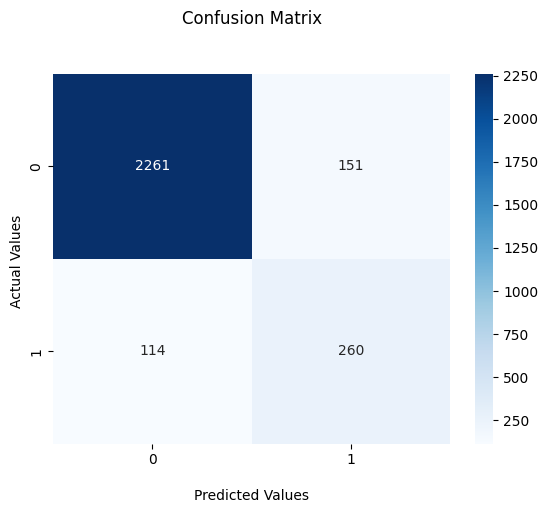

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


baseline_classifier = Pipeline(steps=[
    ('tokenizer', TokenizeTransformer(text_column='Text')),
    ('return_string', Return_String_Transformer(text_column='Text')),
    ('count_vecotizer', CountVectorizer(min_df=0.05, max_df=0.8, ngram_range=(1, 3))),
    ('logistic_regression', DecisionTreeClassifier())
])

baseline_classifier.fit(X_train, y_train)

baseline_predictions = baseline_classifier.predict(X_test)

print(f'F1-score: {f1_score(y_test, baseline_predictions)}')

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()
    
plot_confusion_matrix(y_test, baseline_predictions)

Pipeline with grid search

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier


nlp_pipeline_classifier = Pipeline(steps=[
    ('remove_punctuation', RemovePunctuationTransformer(text_column='Text')),
    ('tokenizer', TokenizeTransformer(text_column='Text')),
    ('remove_stop_words', RemoveStopwordsTransformer(text_column='Text')),
    ('remove_short_tokens', RemoveShortTokensTransformer(text_column='Text')),
    ('stemmer', StemTransformer(text_column='Text')),
    ('return_string', Return_String_Transformer(text_column='Text')),
    ('tfidf_vecotizer', TfidfVectorizer(min_df=0.005, max_df=0.5, ngram_range=(1, 3))),
    ('selection_features', SelectFromModel(estimator=LogisticRegression(random_state=2023, class_weight='balanced'))),
    ('estimator', RandomForestClassifier(random_state=2023, class_weight='balanced', n_estimators=100, max_features='sqrt'))
])

params = {
    'tfidf_vecotizer__min_df': [0.0001, 0.001, 0.01],
    'selection_features__max_features': [50, 100, 500, 1000, 2000],
    'estimator__max_depth': [3, 5, 7, 10, 15]
}

cv_stratified = StratifiedKFold(n_splits=9, random_state=2023, shuffle=True)

classifier_gridsearch = GridSearchCV(nlp_pipeline_classifier,
                                     params, 
                                     scoring='f1',
                                     cv=cv_stratified,
                                     verbose=10, n_jobs=-1)

classifier_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', classifier_gridsearch.best_params_)

classifier = classifier_gridsearch.best_estimator_

predictions = classifier.predict(X_test)

Fitting 9 folds for each of 75 candidates, totalling 675 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
135 fits failed out of a total of 675.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-p


Best hyperparameter: {'estimator__max_depth': 15, 'selection_features__max_features': 1000, 'tfidf_vecotizer__min_df': 0.001}


F1-score: 0.875891583452211


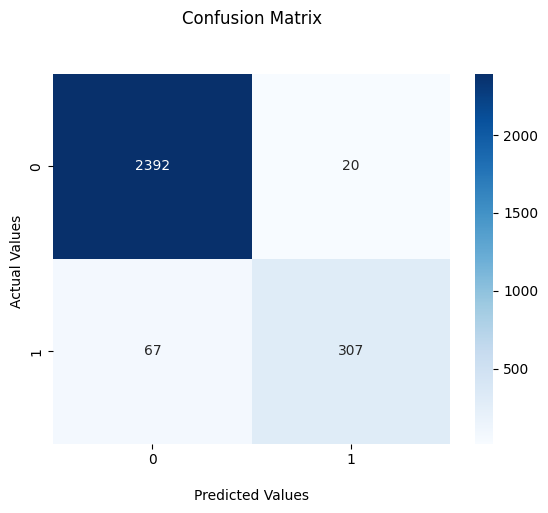

In [40]:
print(f'F1-score: {f1_score(y_test, predictions)}')
    
plot_confusion_matrix(y_test, predictions)